## EXPLOREM EL CONJUNT DE DADES

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve,
    matthews_corrcoef, precision_score, recall_score, classification_report
)

In [40]:

#COMENTAD LOS PATHS NO LOS BORRÉIS PORFA
df_train=pd.read_csv("/mnt/c/Users/katia/OneDrive/Escritorio/UAB/5_QUINTO/INVESTIGACIÓ_OPERATIVA/TREBALL/train.csv")
df_test=pd.read_csv("/mnt/c/Users/katia/OneDrive/Escritorio/UAB/5_QUINTO/INVESTIGACIÓ_OPERATIVA/TREBALL/test.csv")
#df_train=pd.read_csv(r"C:\Users\Emma\Documents\Mates\5e\Aprenentatge_Automatic\Treball\train.csv")
#df_test = pd.read_csv(r"C:\Users\Emma\Documents\Mates\5e\Aprenentatge_Automatic\Treball\test.csv")


# EN ALGÚN SITIO DEL TRABAJO TENEMOS QUE EXPLICAR QUE LOS JUNTAMOS PARA LUEGO SEPARARLOS A NUESTRO GUSTO
df=pd.concat([df_train, df_test], ignore_index=True)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [41]:
df.shape  #la mida del DataFrame són (files, columnes)

(129880, 25)

In [42]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [43]:
df_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [44]:
set(df_train.columns)==set(df_test.columns)

True

In [45]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [46]:
df_test.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [47]:
# per a veure si té valors nuls
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [48]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [50]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [51]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

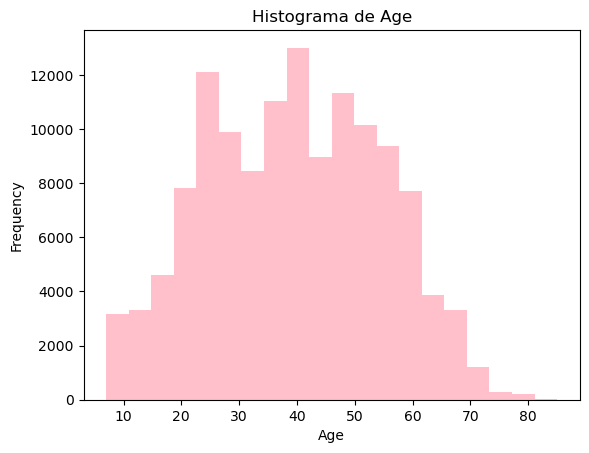

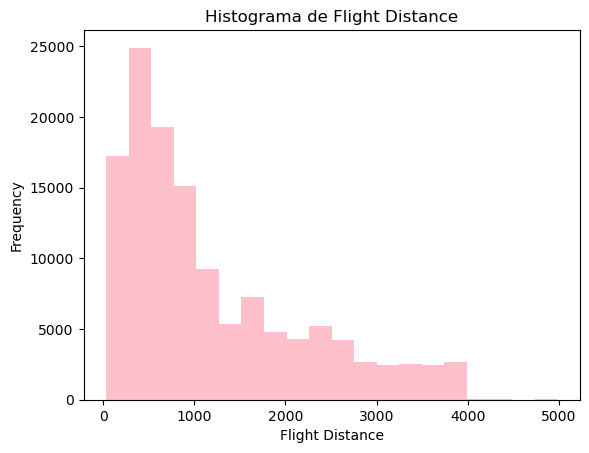

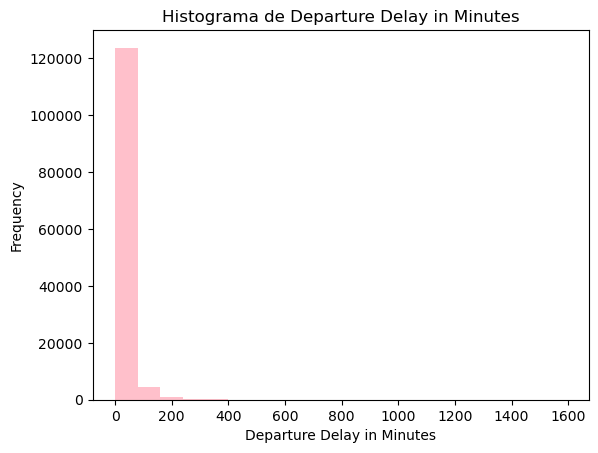

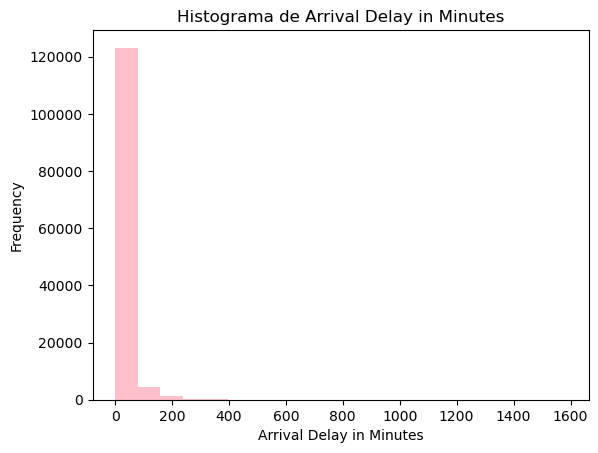

In [52]:
#fem histogrames per les variables numèriques
import matplotlib.pyplot as plt

vars_numeriques = [
    "Age",
    "Flight Distance",
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes"
]

for i in vars_numeriques:
    plt.figure()
    col=i
    plt.hist(df[col], bins=20, color='pink')       #fem 20 intervals, que es representen amb 20 barres
    plt.title(f"Histograma de {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()


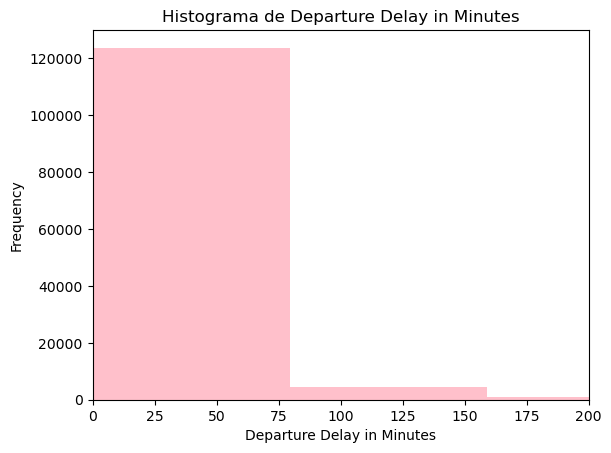

In [53]:
plt.figure()
col="Departure Delay in Minutes"
plt.hist(df[col], bins=20, color='pink')       
plt.xlim(0, 200)                           #limitem l'eix de les x fins a retards de 200 min per poder visualitzar millor sense els outliers
plt.title(f"Histograma de {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


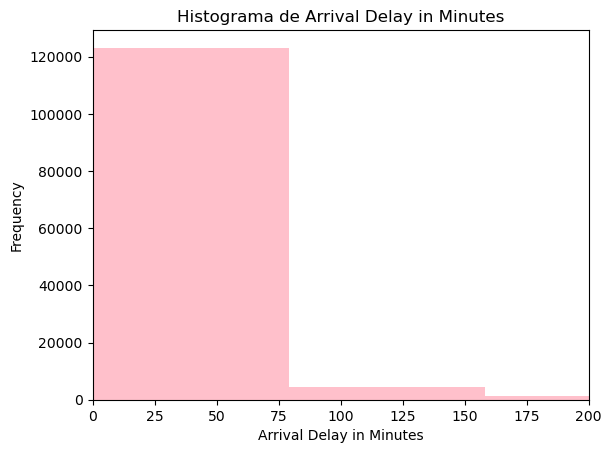

In [54]:
plt.figure()
col="Arrival Delay in Minutes"
plt.hist(df[col], bins=20, color='pink')       
plt.xlim(0, 200)                           #limitem l'eix de les x fins a retards de 200 min per poder visualitzar millor sense els outliers
plt.title(f"Histograma de {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

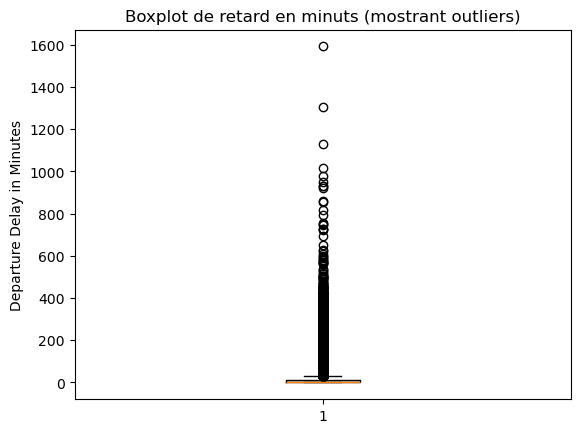

In [55]:
col = "Departure Delay in Minutes"
plt.figure()
plt.boxplot(df[col], vert=True)
plt.title(f"Boxplot de retard en minuts (mostrant outliers)")
plt.ylabel(col)
plt.show()

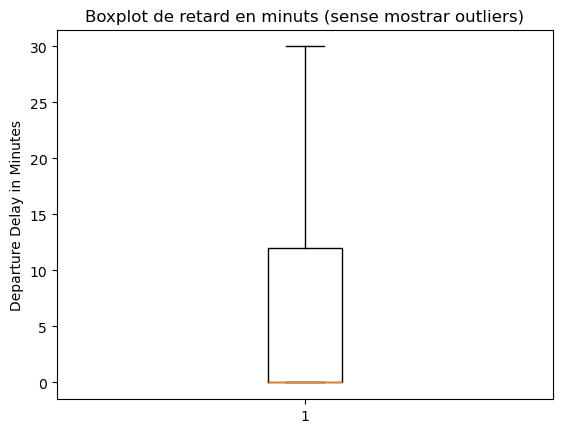

In [56]:
col = "Departure Delay in Minutes"
plt.figure()
plt.boxplot(df[col], vert=True, showfliers=False)  #treiem els outliers per visualitzar millor el Boxplot
plt.title(f"Boxplot de retard en minuts (sense mostrar outliers)")
plt.ylabel(col)
plt.show()

In [57]:
x = df[col]

q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

llindar_sup = q3 + 1.5 * iqr
llindar_inf = q1 - 1.5 * iqr

if (llindar_inf<0):
    llindar_inf=0

outliers = x[(x < llindar_inf) | (x > llindar_sup)]   #x[condició] vol dir prendre els elements de x que compleixen la condició

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Llindar inferior:", llindar_inf)
print("Llindar superior:", llindar_sup)
print("Nombre d'outliers:", outliers.shape[0])
print("Proporció d'outliers:", outliers.shape[0]/df.shape[0])
print("Retard màxim:", x.max())

Q1: 0.0
Q3: 12.0
IQR: 12.0
Llindar inferior: 0
Llindar superior: 30.0
Nombre d'outliers: 18098
Proporció d'outliers: 0.139344009855251
Retard màxim: 1592


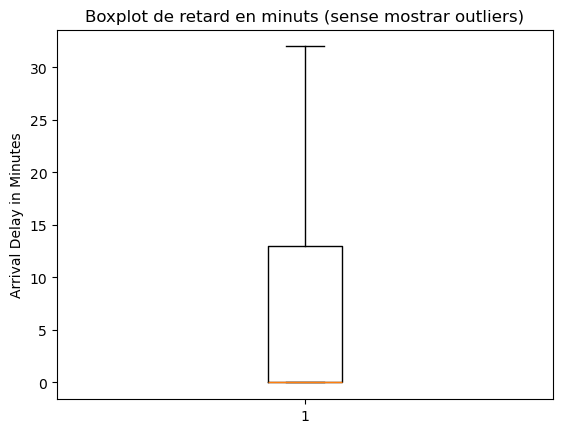

In [58]:
col = "Arrival Delay in Minutes"
plt.figure()
plt.boxplot(df[col].dropna(), vert=True, showfliers=False) 
plt.title(f"Boxplot de retard en minuts (sense mostrar outliers)")
plt.ylabel(col)
plt.show()

In [59]:
x = df[col].dropna()

q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

llindar_sup = q3 + 1.5 * iqr
llindar_inf = q1 - 1.5 * iqr

if (llindar_inf<0):
    llindar_inf=0

outliers = x[(x < llindar_inf) | (x > llindar_sup)]   

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Llindar superior:", llindar_sup)
print("Nombre d'outliers:", outliers.shape[0])
print("Proporció d'outliers:", outliers.shape[0]/df.shape[0])
print("Retard màxim:", x.max())

Q1: 0.0
Q3: 13.0
IQR: 13.0
Llindar superior: 32.5
Nombre d'outliers: 17492
Proporció d'outliers: 0.13467816445950107
Retard màxim: 1584.0


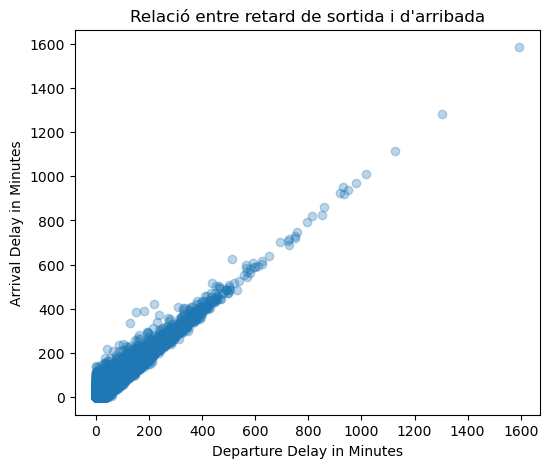

In [60]:
#fem gràfics de dispersió per visualitzar la relació entre dues variables numèriques
col1="Departure Delay in Minutes"
col2="Arrival Delay in Minutes"
plt.figure(figsize=(6, 5))

plt.scatter(df[col1], df[col2], alpha=0.3)  #l'alfa és la transparència dels punts
#si un punt està a (100,120) significa que un mateix passatger va patir un retard de sortida de 100 min, i després un retard d'arribada de 120 min

plt.xlabel(f"{col1}")
plt.ylabel(f"{col2}")
plt.title("Relació entre retard de sortida i d'arribada")
plt.show()

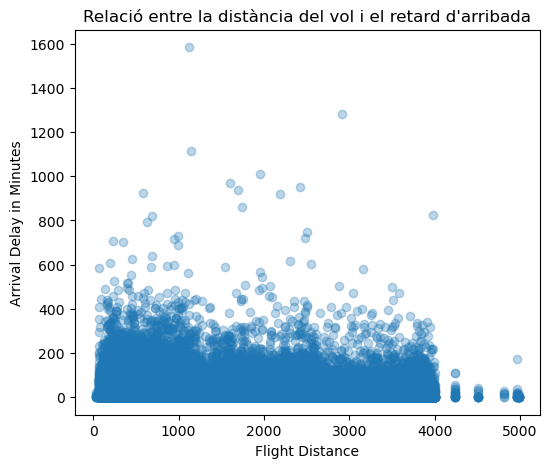

In [61]:
col1="Flight Distance"
col2="Arrival Delay in Minutes"
plt.figure(figsize=(6, 5))

plt.scatter(df[col1], df[col2], alpha=0.3)

plt.xlabel(f"{col1}")
plt.ylabel(f"{col2}")
plt.title("Relació entre la distància del vol i el retard d'arribada")
plt.show()

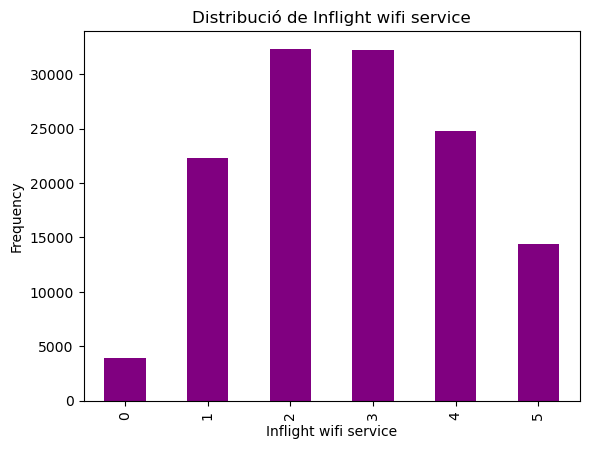

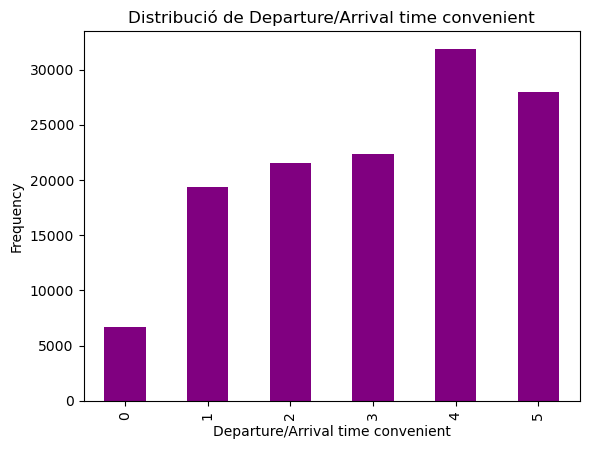

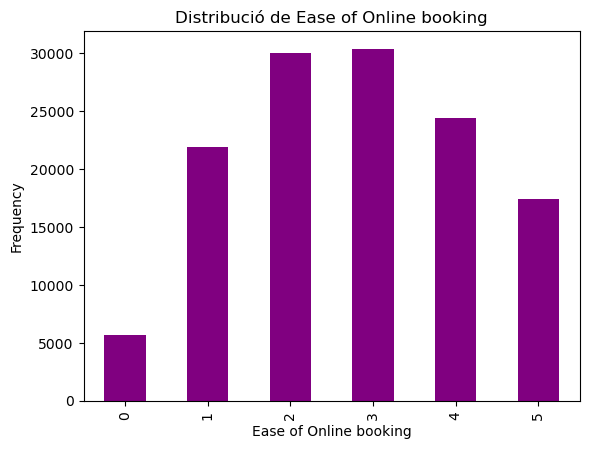

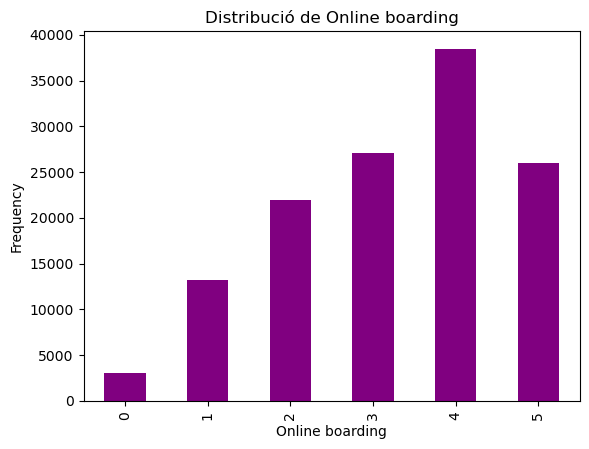

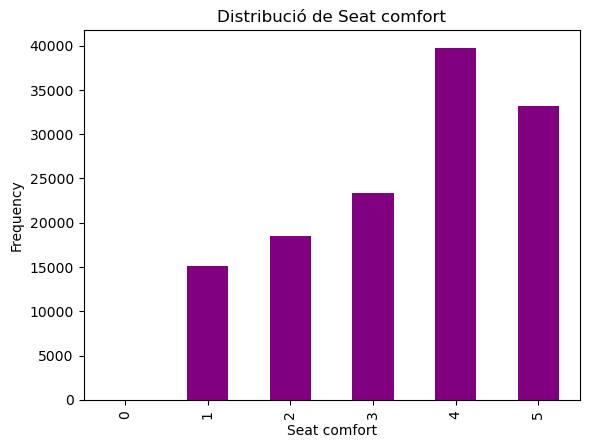

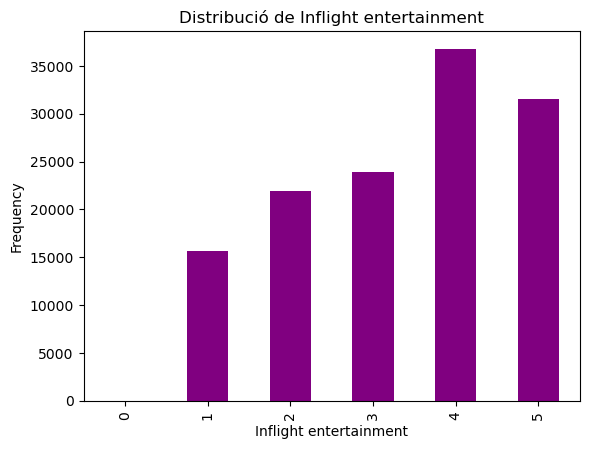

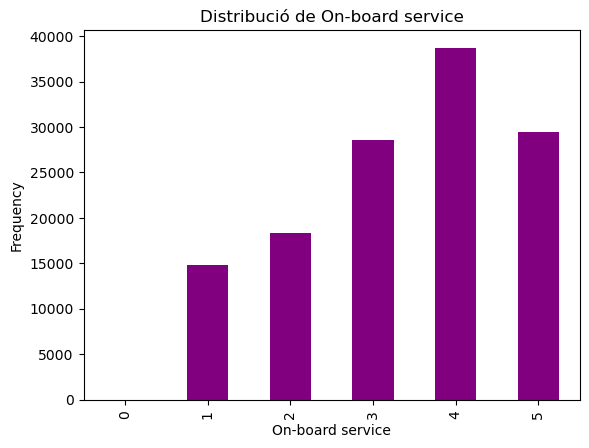

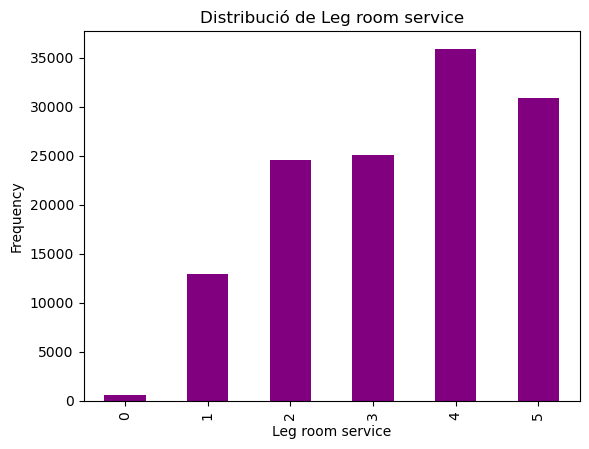

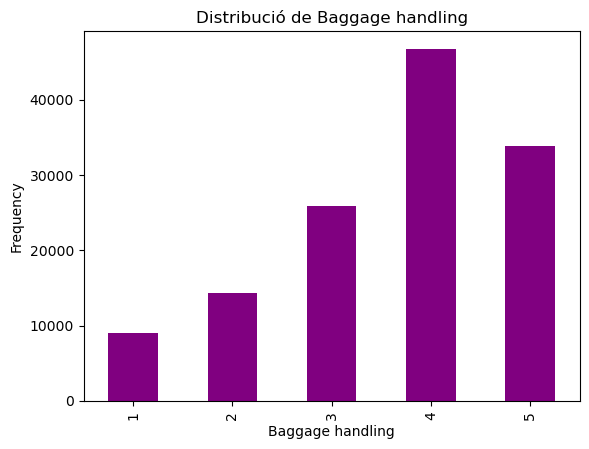

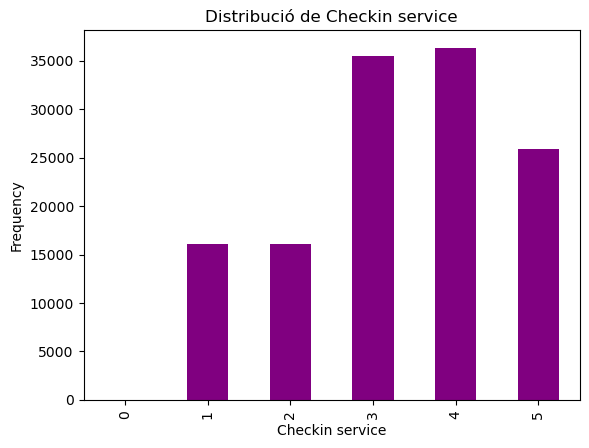

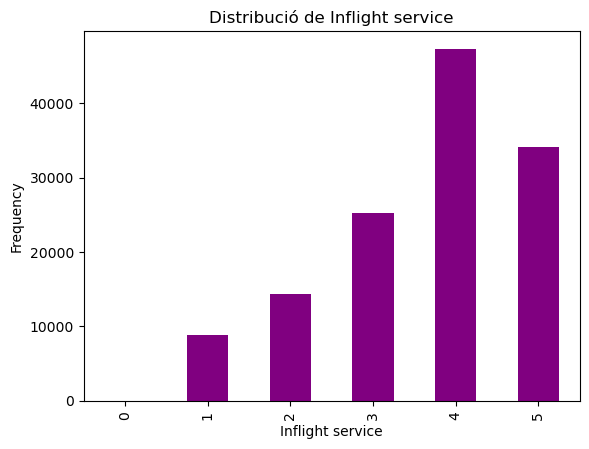

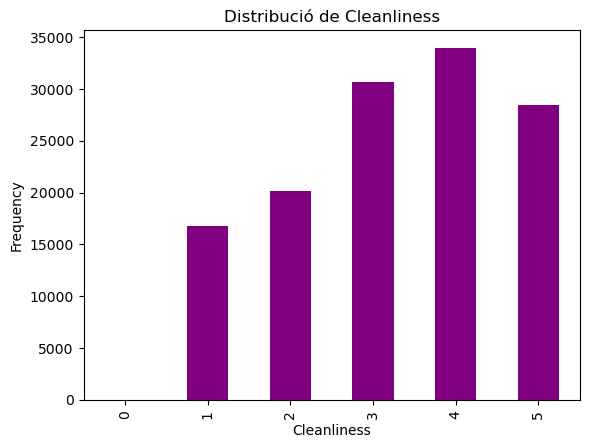

In [62]:
#fem gràfics de barres per visualitzar les variables de valoració
vars_valoracions = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

for i in vars_valoracions:
    col = i
    plt.figure()
    df[col].value_counts().sort_index().plot(kind="bar", color= 'purple')   #posem sort_index() perquè l'eix x vagi de 0 a 5
    plt.title(f"Distribució de {col}")
    plt.ylabel("Frequency")
    plt.show()

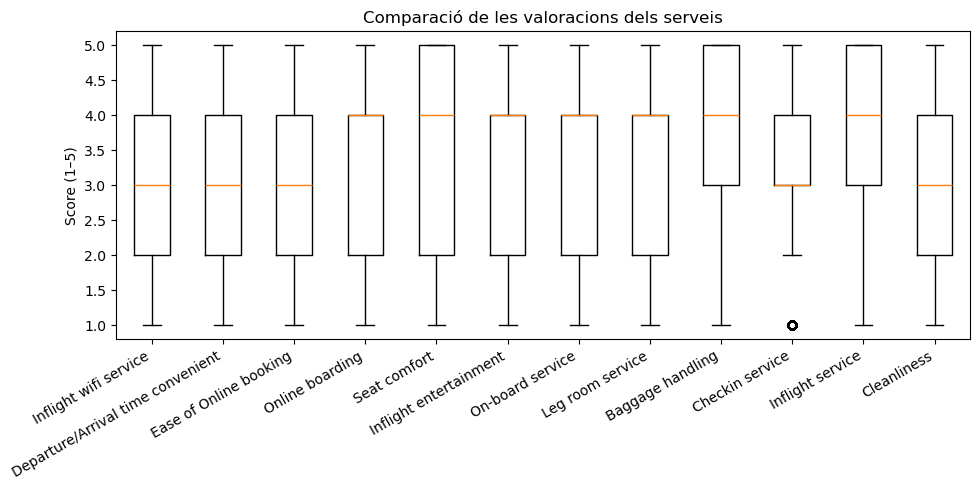

In [63]:
#també podem fer gràfics Boxplot per analitzar les variables de valoracions
data = [
    df[col].replace(0, float("nan")).dropna()     #treiem el 0 que representa que no pot valorar el servei
    for col in vars_valoracions
]

plt.figure(figsize=(10, 5))
plt.boxplot(data, tick_labels=vars_valoracions)
plt.title("Comparació de les valoracions dels serveis")
plt.ylabel("Score (1–5)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [64]:
#mirem els outliers del servei de Checkin
col= "Checkin service"

x = df[col].dropna()

q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

llindar_sup = q3 + 1.5 * iqr
llindar_inf = q1 - 1.5 * iqr

outliers = x[(x < llindar_inf) | (x > llindar_sup)]   

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

print("Nombre d'outliers:", outliers.shape[0])


Q1: 3.0
Q3: 4.0
IQR: 1.0
Nombre d'outliers: 16109


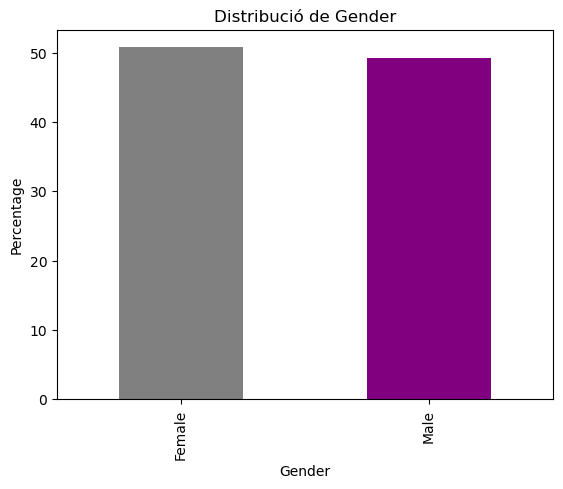

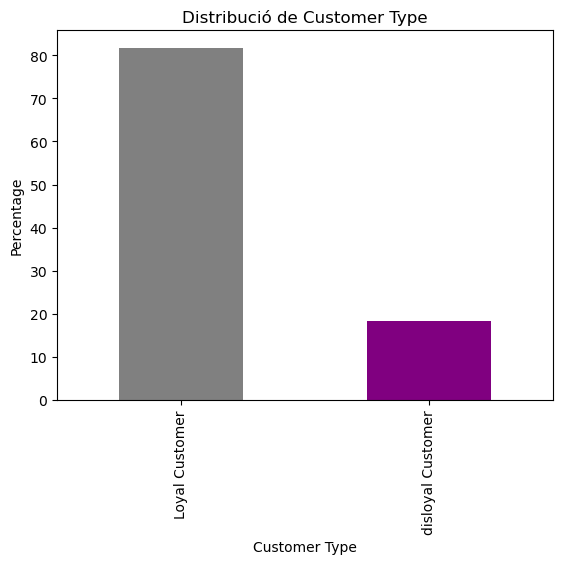

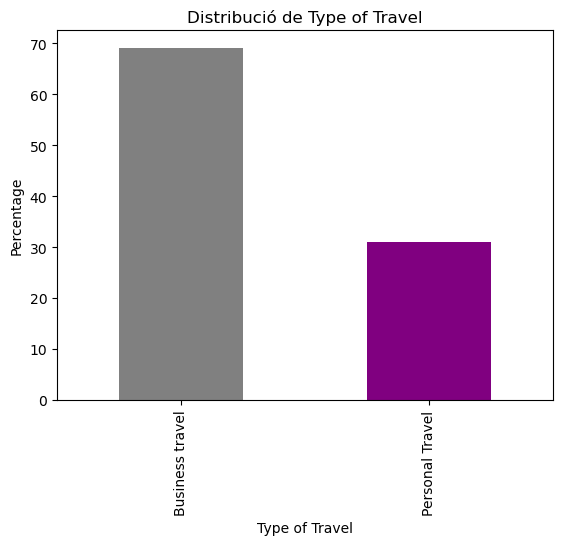

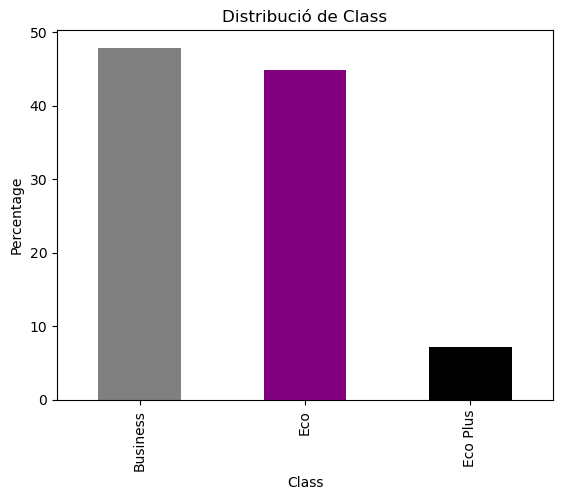

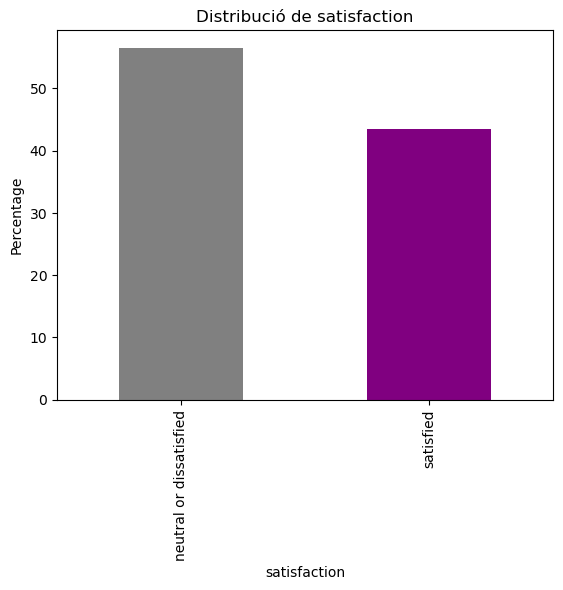

In [65]:
#fem gràfics de barres per visualitzar les variables categòriques
vars_categoriques = [
    "Gender",
    "Customer Type",
    "Type of Travel",
    "Class",
    "satisfaction"
]

for i in vars_categoriques:
    col = i
    plt.figure()
    (df[col].value_counts(normalize=True) * 100).plot(kind="bar", color= ["grey", "purple", "black"])   
    plt.title(f"Distribució de {col}")
    plt.ylabel("Percentage")
    plt.show()

## APLIQUEM ALGORISMES D'APRENENTATGE AUTOMÀTIC PER PREDEIR SI ELS PASSATGERS ESTARÀN O NO SATISFETS
Agafem les ideas de totas les pràctiques fetas fins ara, però fem petitas modificacions, ja que tenim variables categòriques, i hem de fer un 'preprocessament' adequat, eliminant columnes que no ens donen informació com `id`, `Unnamed: 0`

En realitat no les eliminem, simplement no els fem cas perque no hi hagi sobreajust, aixo ho haurém d'explicar al Latex a algun lloc, esborrar quan estigui fet

In [66]:
# copiem la part de reproductibilitat com fan a les pràctiques
RANDOM_STATE=42
np.random.seed(RANDOM_STATE)

# CARREGUEM DE NOU LES DADES, FEM UNA COPIA PER SEGURETAT
# les columnes identificadores no les fem servir com a predictors pero les conservem per evitar sobreajust
df=df.copy()
id_cols=[c for c in ["id","Unnamed: 0"] if c in df.columns]
df_ids=df[id_cols].copy() if len(id_cols) > 0 else None #traçabilitat 
# lo que fem es si tenim columna id la guardem a part, i si no, no fem res

# DEFINIM Y I LES FEATURES X
# convertim a binaria satisfaction. Y=1 satisfied, Y=0 neutral o dissatisfied
y=(df["satisfaction"].astype(str).str.strip().str.lower()=="satisfied").astype(int)
#df["satisfaction"].astype(str) converteix a string
#.str.strip() treu els espais a principi/final
#.str.lower() passa a minúscules
#creem un boolean =="satisfied" True si satisfied i false si no
#.astype(int) converteix true a 1 i false a 0


# X son totes les columnes excepte satisfaction i els IDs
X=df.drop(columns=["satisfaction"]+id_cols)

# SEPAREM LES COLUMNES EN CATEGÒRIQUES I NUMÈRIQUES PER FER PREPROCESSAMENT
cat_cols=X.select_dtypes(include=["object"]).columns.tolist()
num_cols=[c for c in X.columns if c not in cat_cols]

In [67]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [68]:
num_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [69]:
len(cat_cols)+len(num_cols)

22

In [70]:
# DINTINGUIM PIPELINE PER CATEGÒRIQUES I PER NUMÈRIQUES AMB ESCALAT PER SVM I KNN I SENSE ESCALAT PER DT

num_pipe_scaled=Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

num_pipe_noscale=Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

cat_pipe=Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# adjuntem de nou les columnes en dos diferents per svm knn
scaled=ColumnTransformer([
    ("num", num_pipe_scaled, num_cols),
    ("cat",cat_pipe,cat_cols)
])

# aquesta per dt
noscale=ColumnTransformer([
    ("num", num_pipe_noscale, num_cols),
    ("cat",cat_pipe,cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

# skf rapid per probar
skf3=StratifiedKFold(n_splits=3,shuffle=True,random_state=RANDOM_STATE)

# skf final mes robust
skf5=StratifiedKFold(n_splits=5,shuffle=True,random_state=RANDOM_STATE)

In [71]:
# Programem dues funcions auxiliars per comparar tots els tipus de models

# amb aquesta calculem mètriques en validació creuada (mitjana i std)
#retornem ACC, F1, AUC i MCC tal com hem fet a la pràctica 6
def cv_metrics(pipe,Xtr,ytr,cv):
    accs, f1s, aucs, mccs = [], [], [], []

    for tr_idx, va_idx in cv.split(Xtr, ytr):
        X_train_fold=Xtr.iloc[tr_idx] 
        y_train_fold=ytr.iloc[tr_idx]
        X_val_fold = Xtr.iloc[va_idx]
        y_val_fold=ytr.iloc[va_idx]
        
        pipe.fit(X_train_fold, y_train_fold)
        
        if hasattr(pipe, "predict_proba"):
            score = pipe.predict_proba(X_val_fold)[:,1]
            yhat = (score >= 0.5).astype(int)
        else:
            score = pipe.decision_function(X_val_fold)
            yhat = (score >= 0.0).astype(int)
            
        accs.append(accuracy_score(y_val_fold, yhat))
        f1s.append(f1_score(y_val_fold, yhat))
        aucs.append(roc_auc_score(y_val_fold, score))
        mccs.append(matthews_corrcoef(y_val_fold, yhat))

    return {
        "CV_ACC_mean": np.mean(accs), "CV_ACC_std": np.std(accs,ddof=1),
        "CV_F1_mean": np.mean(f1s), "CV_F1_std": np.std(f1s,ddof=1),
        "CV_AUC_mean": np.mean(aucs), "CV_AUC_std": np.std(aucs,ddof=1),
        "CV_MCC_mean": np.mean(mccs), "CV_MCC_std": np.std(mccs,ddof=1),
    }
    
# entrenem el pipeline a tot el train i avaluem el test
# retorna metriques + matriu confusio + punts ROC
def test_metrics(pipe,Xtr,ytr,Xte,yte):
    pipe.fit(Xtr, ytr)
    
    if hasattr(pipe, "predict_proba"):
        score = pipe.predict_proba(Xte)[:,1]
        yhat = (score >= 0.5).astype(int)
    else:
        score = pipe.decision_function(Xte)
        yhat = (score >= 0.0).astype(int)

    cm=confusion_matrix(yte,yhat)
    fpr,tpr,thr=roc_curve(yte,score)

    return{
        "TEST_ACC":accuracy_score(yte,yhat),
        "TEST_F1":f1_score(yte,yhat),
        "TEST_AUC":roc_auc_score(yte,score),
        "TEST_MCC":matthews_corrcoef(yte,yhat),
        "TEST_PREC": precision_score(yte,yhat),
        "TEST_REC": recall_score(yte,yhat),
        "TEST_CM":cm,
        "ROC_fpr":fpr,
        "ROC_tpr":tpr,
        "ROC_thr":thr,
    }

In [73]:
# Definim els models + grids (totes les combinacions posibles dels valors candidats)

svm_pipe=Pipeline([
    ("prep",scaled),
    ("clf",SVC(kernel="rbf",probability=False,random_state=RANDOM_STATE))
])
svm_grid={
    "clf__C": [0.1,1],
    "clf__gamma": ["scale"]
}


svm_lin_pipe=Pipeline([
    ("prep",scaled),
    ("clf",SVC(kernel="linear",probability=False,random_state=RANDOM_STATE))
])
svm_lin_grid={
    "clf__C": [0.1,1] # hem tret C=10, ho expliquem al Latex
}


knn_pipe=Pipeline([
    ("prep", scaled), 
    ("clf", KNeighborsClassifier())
])
knn_grid={
    "clf__n_neighbors": [3,5,7,11,15,21],
    "clf__weights": ["uniform","distance"]
}


dt_pipe=Pipeline([
    ("prep", noscale), 
    ("clf", DecisionTreeClassifier(random_state=RANDOM_STATE))
])
dt_grid={
    "clf__max_depth": [3,5,7,9,12,None],
    "clf__min_samples_leaf": [1,5,10,20]
}


models = [
    ("SVM_linear",svm_lin_pipe,svm_lin_grid),
    ("SVM_RBF",svm_pipe,svm_grid),
    ("kNN",knn_pipe,knn_grid),
    ("DecisionTree",dt_pipe,dt_grid)
    ]

# A PARTIR D'AQUÍ TRIGA 100 HORES EN COMPILAR, NO CAL QUE HO COMPILEU

In [74]:
# ENTRENAMENT + SELECCIÓ D'HIPERPARAMETRES + AVALUACIÓ

rows=[]
roc_curves={} # guardem ROC i despres dibuixem
best_pipes={} # aqui guardem els millors models

for name, base_pipe, grid in models:
    print(f"\n>>> Entrenant {name} ... (GridSearchCV)")
    gs=GridSearchCV(
        estimator=base_pipe, param_grid=grid, scoring="roc_auc", cv=skf3, n_jobs=1,verbose=3
    )
    gs.fit(X_train,y_train)

    best_pipe=gs.best_estimator_
    best_pipes[name]=best_pipe # guardem el pipeline guanyador
    best_params=gs.best_params_

    cvm=cv_metrics(best_pipe,X_train,y_train,skf3)
    tem=test_metrics(best_pipe,X_train,y_train,X_test,y_test)

    row={"Model": name, "BestParams": best_params}
    row.update(cvm)
    row.update({k: tem[k] for k in ["TEST_ACC", "TEST_F1", "TEST_AUC", "TEST_MCC","TEST_PREC","TEST_REC"]})
    rows.append(row)

    roc_curves[name]=(tem["ROC_fpr"],tem["ROC_tpr"]) # guardem ROC i despres dibuixarem menys

    print(f"\n=== {name} ===")
    print("Best params:", best_params)
    print(
        f"CV_AUC_mean: {cvm['CV_AUC_mean']:.6f} | "
        f"TEST_AUC: {tem['TEST_AUC']:.6f} | "
        f"TEST_ACC: {tem['TEST_ACC']:.6f} | "
        f"TEST_F1: {tem['TEST_F1']:.6f} | "
        f"TEST_PREC: {tem['TEST_PREC']:.6f} | "
        f"TEST_REC: {tem['TEST_REC']:.6f} "
    )
    print("Confusion Matrix (test):")
    print(tem["TEST_CM"])

resultats=pd.DataFrame(rows).sort_values(by="TEST_AUC", ascending=False).reset_index(drop=True)

print("\n\n=== TAULA COMPARATIVA FINAL (ordenada per TEST_AUC) ===")
print(resultats.to_string(index=False,float_format=lambda x: f"{x:.6f}"))


>>> Entrenant SVM_linear ... (GridSearchCV)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ........................clf__C=0.1;, score=0.927 total time= 1.3min
[CV 2/3] END ........................clf__C=0.1;, score=0.927 total time= 1.3min
[CV 3/3] END ........................clf__C=0.1;, score=0.926 total time= 1.3min
[CV 1/3] END ..........................clf__C=1;, score=0.927 total time= 4.1min
[CV 2/3] END ..........................clf__C=1;, score=0.927 total time= 3.8min
[CV 3/3] END ..........................clf__C=1;, score=0.926 total time= 3.8min

=== SVM_linear ===
Best params: {'clf__C': 1}
CV_AUC_mean: 0.926620 | TEST_AUC: 0.927568 | TEST_ACC: 0.875141 | TEST_F1: 0.851826 | TEST_PREC: 0.879220 | TEST_REC: 0.826087 
Confusion Matrix (test):
[[20115  1921]
 [ 2944 13984]]

>>> Entrenant SVM_RBF ... (GridSearchCV)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ......clf__C=0.1, clf__gamma=scale;, score=0.982 total time= 1.2m

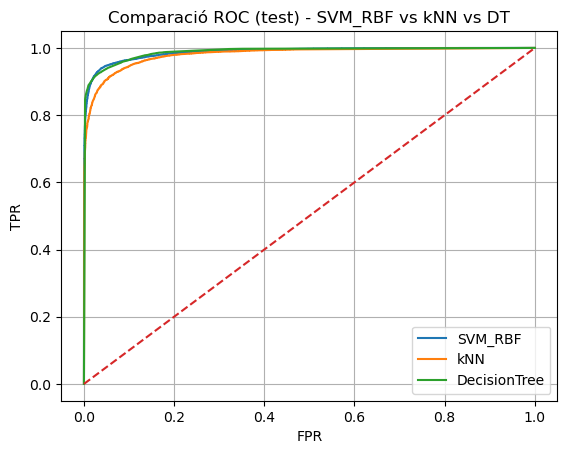

In [75]:
# A partir d'aqui no tenim en compte svm lineal per dibuixar

models_for_plots=["SVM_RBF","kNN","DecisionTree"]

plt.figure()
for name in models_for_plots:
    fpr, tpr = roc_curves[name]
    plt.plot(fpr,tpr,label=name)

plt.plot([0,1],[0,1], linestyle="--")
plt.title("Comparació ROC (test) - SVM_RBF vs kNN vs DT")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.legend()
plt.show()

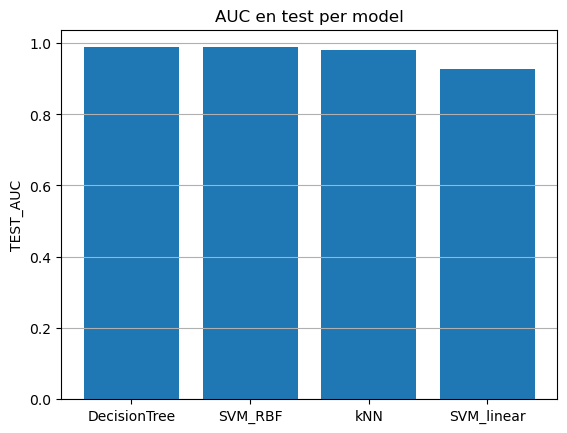

In [76]:
plt.figure()
plt.bar(resultats["Model"],resultats["TEST_AUC"])
plt.title("AUC en test per model")
plt.ylabel("TEST_AUC")
plt.grid(True, axis="y")
plt.show()

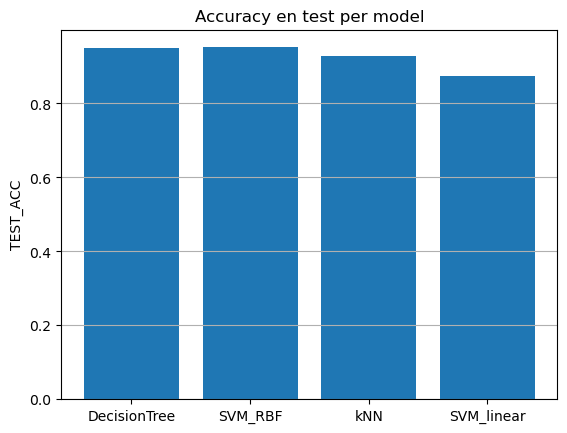

In [77]:
plt.figure()
plt.bar(resultats["Model"],resultats["TEST_ACC"])
plt.title("Accuracy en test per model")
plt.ylabel("TEST_ACC")
plt.grid(True, axis="y")
plt.show()

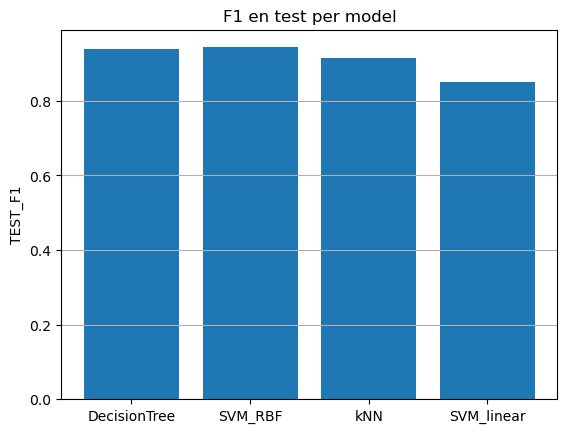

In [78]:
plt.figure()
plt.bar(resultats["Model"],resultats["TEST_F1"])
plt.title("F1 en test per model")
plt.ylabel("TEST_F1")
plt.grid(True, axis="y")
plt.show()

In [80]:
# FEM UNA AVALUACIÓ PROFUNDA DELS MODELS

# un cop tenim els models amb el millor pipeline, generem mètriques completes en test,
# matriu confusió, tp,fp,tn,fn, tpr,fpr, roc, classification_report

from sklearn.metrics import classification_report

def deep_test_report(best_pipe,Xtr,ytr,Xte,yte,name="Model"):
    best_pipe.fit(Xtr,ytr)

    # score + yhat coherent
    if hasattr(best_pipe, "predict_proba"):
        score = best_pipe.predict_proba(Xte)[:,1]
        yhat = (score >= 0.5).astype(int)
    else:
        score = best_pipe.decision_function(Xte)
        yhat = (score >= 0.0).astype(int)

    cm=confusion_matrix(yte,yhat)
    tn, fp, fn, tp=cm.ravel()

    tpr=tp/(tp+fn) if (tp+fn) > 0 else 0.0
    fpr=fp/(fp+tn) if (fp+tn) > 0 else 0.0

    fpr_roc, tpr_roc, thr=roc_curve(yte,score)

    out={
        "Model": name,
        "TEST_ACC":accuracy_score(yte,yhat),
        "TEST_F1":f1_score(yte,yhat),
        "TEST_AUC":roc_auc_score(yte,score),
        "TEST_MCC":matthews_corrcoef(yte,yhat),
        "TEST_PREC": precision_score(yte,yhat),
        "TEST_REC": recall_score(yte,yhat),
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "TPR":tpr, "FPR":fpr,
        "CM":cm, 
        "ROC_fpr": fpr_roc, "ROC_tpr": tpr_roc
    }


    print(f"\n===== {name} (best_pipe) =====")
    print("Mètriques (test):")
    print(
        f"ACC={out['TEST_ACC']:.6f} | F1={out['TEST_F1']:.6f} | AUC={out['TEST_AUC']:.6f} | "
        f"MCC={out['TEST_MCC']:.6f} | PREC={out['TEST_PREC']:.6f} | REC={out['TEST_REC']:.6f} "
    )
    print("CM:\n", cm)
    print(f"TP={tp} | FP={fp} | TN={tn} | FN={fn}")
    print(f"TPR={tpr:.6f} | FPR={fpr:.6f}")

    print("\nClassification report:")
    print(classification_report(yte,yhat,digits=4))

    return out


deep_rows=[]
deep_roc={}

for name, pipe in best_pipes.items():
    out=deep_test_report(pipe,X_train,y_train,X_test,y_test,name=name)
    deep_rows.append({k: out[k] for k in [
        "Model", "TEST_ACC", "TEST_F1", "TEST_AUC", "TEST_MCC",
        "TEST_PREC","TEST_REC", "TP", "FP", "TN", "FN", "TPR", "FPR"
    ]})
    deep_roc[name]=(out["ROC_fpr"],out["ROC_tpr"])

deep_results=pd.DataFrame(deep_rows).sort_values("TEST_AUC", ascending=False).reset_index(drop=True)

print("\n\n=== TAULA 'DEEP' (test) ordenada per AUC ===")
print(deep_results.to_string(index=False, float_format=lambda x: f"{x:.6f}"))



===== SVM_linear (best_pipe) =====
Mètriques (test):
ACC=0.875141 | F1=0.851826 | AUC=0.927568 | MCC=0.745203 | PREC=0.879220 | REC=0.826087 
CM:
 [[20115  1921]
 [ 2944 13984]]
TP=13984 | FP=1921 | TN=20115 | FN=2944
TPR=0.826087 | FPR=0.087176

Classification report:
              precision    recall  f1-score   support

           0     0.8723    0.9128    0.8921     22036
           1     0.8792    0.8261    0.8518     16928

    accuracy                         0.8751     38964
   macro avg     0.8758    0.8695    0.8720     38964
weighted avg     0.8753    0.8751    0.8746     38964


===== SVM_RBF (best_pipe) =====
Mètriques (test):
ACC=0.951981 | F1=0.943980 | AUC=0.987961 | MCC=0.902235 | PREC=0.957076 | REC=0.931238 
CM:
 [[21329   707]
 [ 1164 15764]]
TP=15764 | FP=707 | TN=21329 | FN=1164
TPR=0.931238 | FPR=0.032084

Classification report:
              precision    recall  f1-score   support

           0     0.9483    0.9679    0.9580     22036
           1     0.9571   

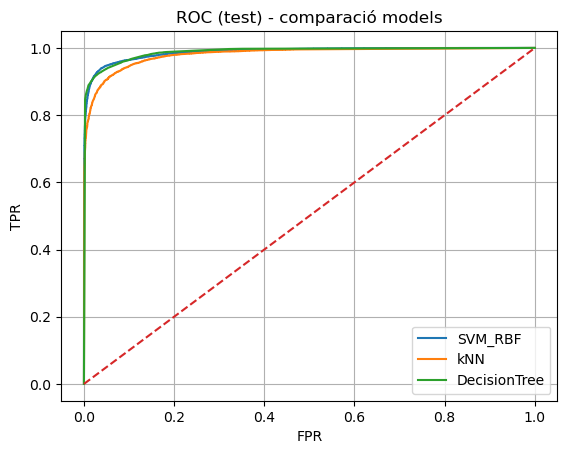

In [81]:
models_for_plots = [m for m in deep_roc.keys() if m in ["SVM_RBF", "kNN", "DecisionTree"]]

plt.figure()
for name in models_for_plots:
    fpr,tpr=deep_roc[name]
    plt.plot(fpr,tpr,label=name)

plt.plot([0,1],[0,1], linestyle="--")
plt.title("ROC (test) - comparació models")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.legend()
plt.show()


=== Top-15 importàncies (DecisionTree) ===
                             feature  importance
                num__Online boarding    0.412760
          num__Inflight wifi service    0.199512
 cat__Type of Travel_Business travel    0.165045
         num__Inflight entertainment    0.050855
cat__Customer Type_disloyal Customer    0.038222
                num__Checkin service    0.026084
                 cat__Class_Business    0.020801
               num__Baggage handling    0.013402
                  num__Gate location    0.012807
               num__Inflight service    0.009586
                   num__Seat comfort    0.008975
                    num__Cleanliness    0.007593
                            num__Age    0.007438
               num__Leg room service    0.006834
   cat__Customer Type_Loyal Customer    0.005373


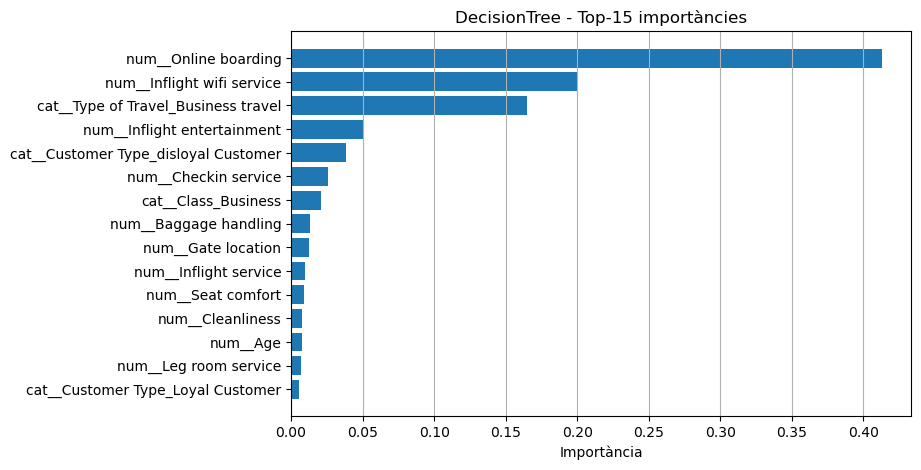

In [82]:
if "DecisionTree" in best_pipes:
    best_dt=best_pipes["DecisionTree"]

    feat_names=best_dt.named_steps["prep"].get_feature_names_out()
    importances=best_dt.named_steps["clf"].feature_importances_

    imp=(pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance",ascending=False).head(15))

    print("\n=== Top-15 importàncies (DecisionTree) ===")
    print(imp.to_string(index=False))

    plt.figure(figsize=(8,5))
    plt.barh(imp["feature"][::-1],imp["importance"][::-1])
    plt.title("DecisionTree - Top-15 importàncies")
    plt.xlabel("Importància")
    plt.grid(True,axis="x")
    plt.show()

In [83]:
deep_results.to_csv("resultats_deep_test.csv",index=False)

In [84]:
if "DecisionTree" in best_pipes:
    imp.to_csv("dt_top15_importancies.csv",index=False)